<a href="https://colab.research.google.com/github/JasonLimJS/Grab-AI-for-SEA/blob/master/Model_Development_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploratory Data Analysis**

A. Install all relevant libraries.

In [0]:
!pip install numpy
!pip install pandas
!pip install python-geohash
!pip install sklearn
!pip install matplotlib
!pip install seaborn

B.Load relevant libraries.

In [0]:
import os
import pandas as pd
import numpy as np
import time
import geohash
import matplotlib.pyplot as plt
import io
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

C. Mount google drive.

In [0]:
from google.colab import drive
drive.mount('drive') 
#You would be prompted to activate with an activation key through the link which would be found below 
#upon running this cell if you are mounting your Google drive for the first time

D. Import raw data and examine its data structure.

In [0]:
#Please input the path where your 'training.csv' data is stored in your google drive as followed:
raw_data_path= 'drive/My Drive/training.csv'
raw_dat= pd.read_csv(raw_data_path)

print(raw_dat.info())
print('\n')
print(raw_dat.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB
None


  geohash6  day timestamp    demand
0   qp03wc   18      20:0  0.020072
1   qp03pn   10     14:30  0.024721
2   qp09sw    9      6:15  0.102821
3   qp0991   32       5:0  0.088755
4   qp090q   15       4:0  0.074468
5   qp03tu    1     12:15  0.023843
6   qp096d   25      3:30  0.007460
7   qp03nr   51     20:45  0.000293
8   qp093r   48      6:15  0.054170
9   qp03r2    4     22:15  0.123463


E. Remove missing data, transform geospatial 'geohash6' variable and transform 'time_stamp' variable

In [0]:
raw= raw_dat
raw.dropna(inplace=True)

func1= np.vectorize(geohash.decode)
array1= np.asarray(func1(raw.geohash6),dtype='float64')
raw['lat']= array1[0,:]
raw['long']=array1[1,:]


col_labels=['hour','minute']
raw[col_labels]=raw.timestamp.str.split(':',expand=True).astype(int)
raw['time_min']= raw.hour*60 + raw.minute

print(raw.info())
print('\n')
print(raw.head())

raw.to_csv('raw.csv')
!cp raw.csv drive/My\ Drive/

raw=pd.read_csv('drive/My Drive/raw.csv',index_col=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206321 entries, 0 to 4206320
Data columns (total 9 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
lat          float64
long         float64
hour         int64
minute       int64
time_min     int64
dtypes: float64(3), int64(4), object(2)
memory usage: 320.9+ MB
None


  geohash6  day timestamp    demand  ...       long  hour  minute  time_min
0   qp03wc   18      20:0  0.020072  ...  90.653687    20       0      1200
1   qp03pn   10     14:30  0.024721  ...  90.664673    14      30       870
2   qp09sw    9      6:15  0.102821  ...  90.906372     6      15       375
3   qp0991   32       5:0  0.088755  ...  90.752563     5       0       300
4   qp090q   15       4:0  0.074468  ...  90.719604     4       0       240

[5 rows x 9 columns]


F. Examine summary statistics of raw data after being processed.

In [0]:
for col in raw.columns:
    print('Summary statistics of ' + col + ' is : \n')
    print(raw[col].describe())
    print('\n')

Summary statistics of geohash6 is : 

count     4206321
unique       1329
top        qp03xw
freq         5846
Name: geohash6, dtype: object


Summary statistics of day is : 

count    4.206321e+06
mean     3.145299e+01
std      1.768278e+01
min      1.000000e+00
25%      1.600000e+01
50%      3.200000e+01
75%      4.700000e+01
max      6.100000e+01
Name: day, dtype: float64


Summary statistics of timestamp is : 

count     4206321
unique         96
top           9:0
freq        57281
Name: timestamp, dtype: object


Summary statistics of demand is : 

count    4.206321e+06
mean     1.050907e-01
std      1.592655e-01
min      3.092217e-09
25%      1.867379e-02
50%      5.043463e-02
75%      1.208644e-01
max      1.000000e+00
Name: demand, dtype: float64


Summary statistics of lat is : 

count    4.206321e+06
mean    -5.347428e+00
std      5.670886e-02
min     -5.484924e+00
25%     -5.391541e+00
50%     -5.347595e+00
75%     -5.303650e+00
max     -5.237732e+00
Name: lat, dtype: float64

# **2. Does Linear Relationship Exists between Time and Demand ?**

A. Linear relationship of this is examined across all geographical locations

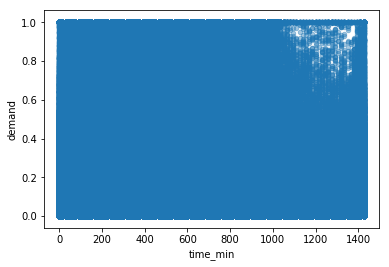

In [0]:
raw.plot(x='time_min',y='demand',kind='scatter',alpha=0.4)
plt.show()

From the diagram above, it is obvious that demand does not vary lienarly with time.

B. Linear relationhip of this is examined on the locations with most observations, qp03xw

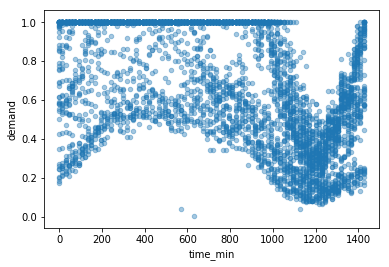

In [0]:
most_obs_area= raw[raw.geohash6=='qp03xw']
most_obs_area.plot(x='time_min',y='demand',kind='scatter',alpha=0.4)
plt.show()

Again, no linear relationship is found between time and demand when we zoom into just one location.

**How about the relationship between time and natural logarithm of demand ?**

C. Linear relationship of this is examined across all geographical locations

[]

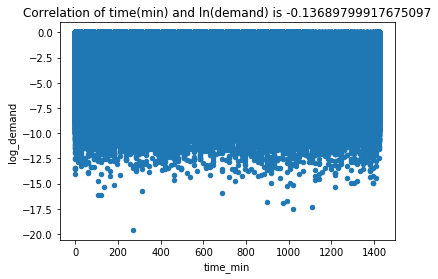

In [0]:
ln_demand_data= raw.copy()
ln_demand_data['log_demand']= np.log(ln_demand_data['demand'])
ln_demand_data.plot(x='time_min',y='log_demand',kind='scatter')
correl= ln_demand_data[['time_min','log_demand']].corr().iloc[0,1]
plt.title('Correlation of time(min) and ln(demand) ' + 'is ' + str(correl))
plt.plot()
#Correlation of time(min) and ln(demand) is at -0.14

D. Linear relationhip of this is examined on the locations with most observations, qp03xw

[]

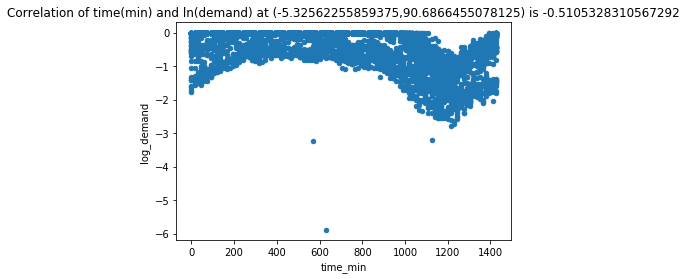

In [0]:
most_obs_area['log_demand']= np.log(most_obs_area['demand'])
most_obs_area.plot(x='time_min',y='log_demand',kind='scatter')
correl= most_obs_area[['time_min','log_demand']].corr().iloc[0,1]
plt.title('Correlation of time(min) and ln(demand) at (' + str(most_obs_area.lat.values[0]) + ',' + \
          str(most_obs_area.long.values[0]) + ') is ' + str(correl))
plt.plot()
#Correlation of time(min) and ln(demand) is at -0.51

From the 2 diagrams above, it is unlikely that the ln(demand) has a strong correlation with time either.

# **3. Are transport demands having definite autocorrelations ?**

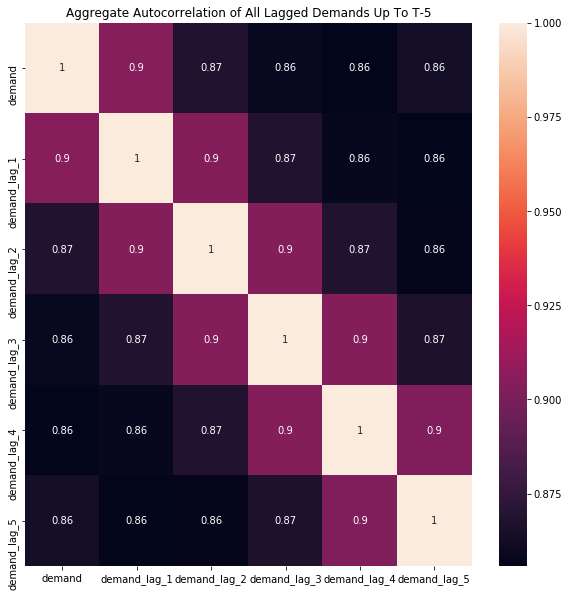

In [0]:
master=raw.copy()
master.sort_values(by=['geohash6','time_min','day'],inplace=True)

for j in range(1,6):
  master['demand_lag_' + str(j)]= master.groupby(['geohash6','time_min']).demand.shift(j)

master.dropna(inplace=True)

var=[]
for j in range(1,6):
  var.append('demand_lag_' + str(j))

corr_mat=  master[['demand'] + var]
fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(corr_mat.corr(),annot=True,ax=ax)
ax.set_title('Aggregate Autocorrelation of All Lagged Demands Up To T-5')
plt.show()

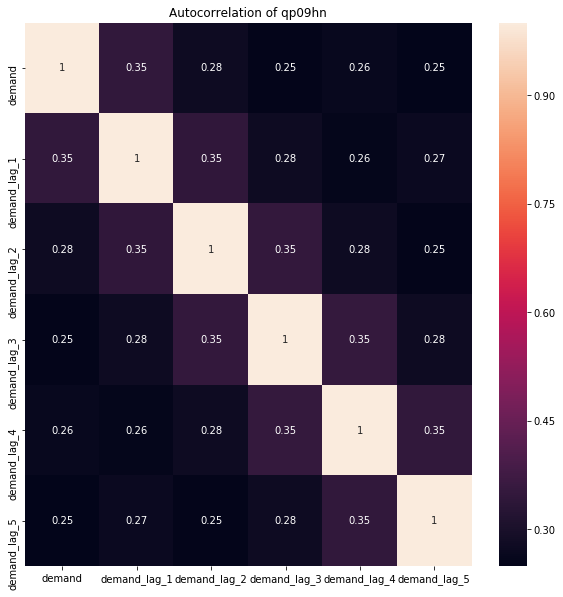

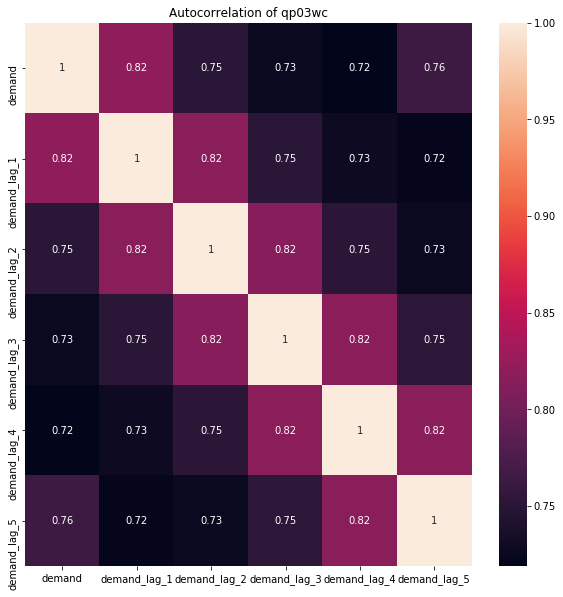

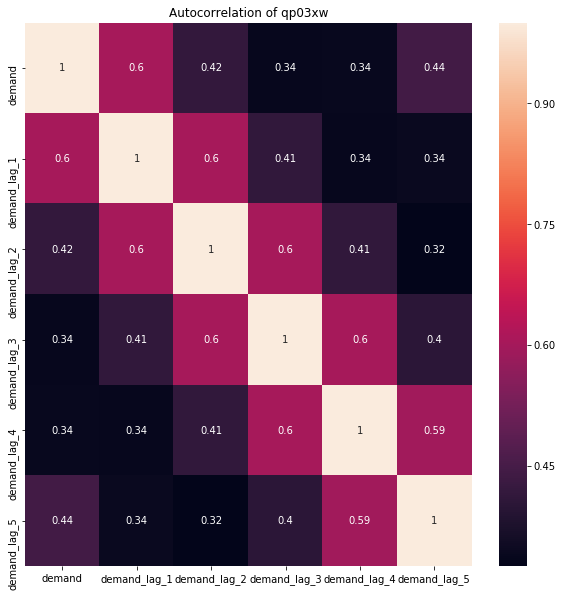

In [0]:
single_mat1= master[master.geohash6=='qp03xw'][['demand'] + var]
single_mat2= master[master.geohash6==master.geohash6[0]][['demand'] + var]
single_mat3= master[master.geohash6==master.geohash6[len(master)]][['demand'] + var]

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(single_mat3.corr(),annot=True,ax=ax)
ax.set_title('Autocorrelation of ' + master.geohash6[len(master)])
                                                     
fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(single_mat2.corr(),annot=True,ax=ax)
ax.set_title('Autocorrelation of ' + master.geohash6[0])

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(single_mat1.corr(),annot=True,ax=ax)
ax.set_title('Autocorrelation of ' + 'qp03xw')
plt.show()


From the heatmaps above, it seems that traffic demand at certain time interval,t is correlated with its 1-day lagged value.

# **4. Final Model: Ensemble kNN Model**

Model 1: 15 most recent day kNN model

This model takes the most recent 15-day data for each geographical location and train a K- Nearest Neighbor Algorithm on it. The detailed code to train this model could be  found at [Model 1 of Ensemble kNN Model](https://github.com/JasonLimJS/Grab-AI-for-SEA/blob/master/Model%201%20of%20Ensemble%20kNN%20Model.ipynb)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=None, n_neighbors=22, p=2,
weights='uniform')

Model 2: kNN model with lagged demand as an additional feature, and being transformed via Principal Component Analysis (PCA)

This model takes the lagged demand variable of previous most recent day for each timestamp as an additional feature.  The detailed code to train this model could be found at [Model 2 of Ensemble kNN Model](https://github.com/JasonLimJS/Grab-AI-for-SEA/blob/master/Model%202%20of%20Ensemble%20kNN%20Model.ipynb)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                    weights='distance')

Weightage:

After some hyperparameters tuning, the optimum weights for this ensemble model is 60% for model 1 and 40% for model 2. Hence, 60% of weights would be given to the predictions made by model 1 while 40% would be given to the predictions made by model 2.